# Project: Music Genre Classification for Spotify Tracks

## Exploratory Data Analysis and Visualization

In [6]:
# read data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

input_path = 'SpotifyFeatures.csv'
raw_df = pd.read_csv(input_path, delimiter=',')
raw_df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
194085,Movie,Larry Groce,Frere Jacques,6xrrnB6Cka308Zx1qEcm87,6,0.6110,0.601,84853,0.225,0.000004,D#,0.113,-8.511,Major,0.0340,74.447,4/4,0.3620
137211,Reggae,Ken Boothe,Black Gold & Green,1SQrycDUFmtojGZUfOFO1v,37,0.3980,0.769,189627,0.512,0.000711,G,0.103,-7.776,Minor,0.0700,81.376,4/4,0.6750
200613,Soundtrack,Ramin Djawadi,Let’s Kill Some Crows,6u7FgqzXxq0py3gvrdOoH8,34,0.3220,0.618,216960,0.624,0.676000,A,0.102,-14.522,Major,0.0540,128.033,4/4,0.0775
63031,Folk,Death Cab for Cutie,Lightness,3EnD9mAbEHTFKDGjhZixBL,45,0.0981,0.693,210213,0.398,0.002420,C,0.665,-11.794,Major,0.0260,109.806,4/4,0.0695
138983,Reggaeton,Ozuna,El Farsante,5EId1m4DNwTf3at31w8bPJ,74,0.2000,0.735,233827,0.703,0.000000,F#,0.259,-4.249,Major,0.0611,120.007,4/4,0.3230


<BarContainer object of 27 artists>

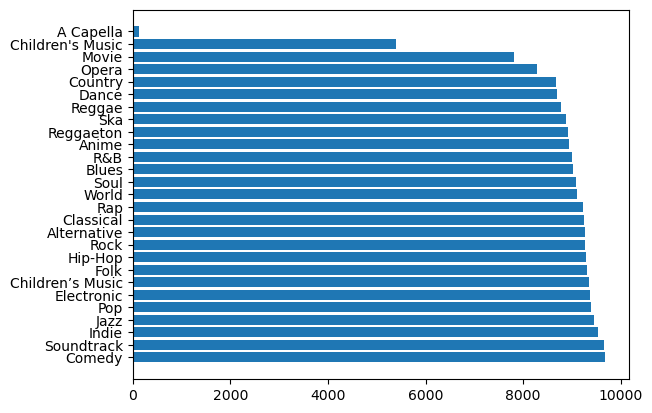

In [7]:
# genre is our class labels
genre_counts = raw_df['genre'].value_counts()
plt.rcdefaults()
fig, ax = plt.subplots()
plt.barh(genre_counts.index,genre_counts,align='center')

- A Capella has extremely small sample size
- Childern's Music has two labels

<BarContainer object of 26 artists>

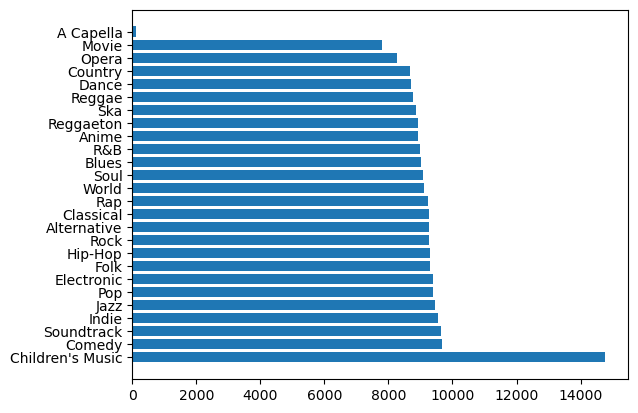

In [8]:
# Children's Music duplicated
raw_df["genre"] = raw_df["genre"].replace("Children’s Music", "Children's Music")
genre_counts = raw_df['genre'].value_counts()
plt.rcdefaults()
fig, ax = plt.subplots()
plt.barh(genre_counts.index,genre_counts,align='center')

In [9]:
# check NA
raw_df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [10]:
#Check for duplicated track_id
df1 = raw_df[raw_df.duplicated(subset='track_id',keep='first')==False]
print('Raw: {}'.format(raw_df.shape))
print('df1: {}'.format(df1.shape))

Raw: (232725, 18)
df1: (176774, 18)


In [11]:
y=df1['genre']
X=df1.iloc[:,4:]
X.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
79492,12,0.8580,0.516,201267,0.449,0.893000,D,0.0788,-15.950,Major,0.0426,85.173,4/4,0.568
66713,79,0.0232,0.890,233087,0.633,0.000343,B,0.0993,-5.475,Major,0.1680,139.948,4/4,0.425
94807,70,0.1590,0.676,202187,0.645,0.001720,G#,0.1060,-9.335,Minor,0.0992,151.058,4/4,0.537
130504,26,0.9650,0.532,213467,0.132,0.935000,A,0.0886,-21.183,Major,0.0532,127.811,4/4,0.687
162350,36,0.1460,0.771,171102,0.853,0.000000,E,0.0497,-5.006,Minor,0.1930,92.041,4/4,0.724


In [12]:
X.describe(include='all')

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774,176774.000000,176774.000000,176774,176774.000000,176774.000000,176774,176774.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,2,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,Major,NaN,NaN,4/4,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,20970,NaN,NaN,116619,NaN,NaN,149187,NaN
mean,36.273162,0.404135,0.541068,2.361272e+05,0.557025,0.172073,NaN,0.224531,-10.137605,NaN,0.127395,117.203679,NaN,0.451595
std,17.391016,0.366302,0.190387,1.305132e+05,0.275839,0.322936,NaN,0.211027,6.395551,NaN,0.204345,31.325091,NaN,0.267820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,NaN,0.009670,-52.457000,NaN,0.022200,30.379000,NaN,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,NaN,0.097500,-12.851000,NaN,0.036800,92.006000,NaN,0.222000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,NaN,0.130000,-8.191000,NaN,0.049400,115.006500,NaN,0.440000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,NaN,0.277000,-5.631000,NaN,0.102000,138.799750,NaN,0.667000


# Encode Categorical Data

In [13]:
# remove unwanted feature
# the original API from Spotify API Doc are integer values, does not sure how author transformed to current categorical values 
# https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/
X = X.drop('time_signature',axis = 1)

# label encoding
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

le = LabelEncoder()
labels = le.fit_transform(y)

# encoding and scaling
numerical_variables  = X.select_dtypes(include=[np.number]).columns # numerical 

# one hot encode
X['key'] = pd.Categorical(X['key'])
X_key_OneHot = pd.get_dummies(X['key'], prefix = 'key')
X['mode'] = pd.Categorical(X['mode'])
X_mode_OneHot = pd.get_dummies(X['mode'], prefix = 'mode')

# convert back to pd data frame
features = pd.concat([X[numerical_variables], X_key_OneHot, X_mode_OneHot], axis=1)
features.head(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,...,1,0,0,0,0,0,0,0,1,0
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,...,0,0,0,0,0,1,0,0,0,1
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,...,0,0,0,0,0,0,0,0,0,1
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,...,1,0,0,0,0,0,0,0,1,0
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,...,0,0,0,0,1,0,0,0,1,0


In [14]:
features.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,...,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,36.273162,0.404135,0.541068,2.361272e+05,0.557025,0.172073,0.224531,-10.137605,0.127395,117.203679,...,0.095353,0.105462,0.033715,0.075848,0.088277,0.064291,0.115832,0.063216,0.659707,0.340293
std,17.391016,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211027,6.395551,0.204345,31.325091,...,0.293703,0.307149,0.180496,0.264756,0.283697,0.245272,0.320024,0.243352,0.473809,0.473809
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.799750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

In [15]:
from sklearn.feature_selection import SelectKBest

kb = SelectKBest(k=5) # ANOVA
kb.fit(features, labels)
selected = kb.get_support(True)
print(features.columns[selected])

input_features = features.iloc[:,selected]
input_features.sample(5)

Index(['popularity', 'acousticness', 'danceability', 'loudness',
       'speechiness'],
      dtype='object')


,popularity,acousticness,danceability,loudness,speechiness
216866,43,0.9240,0.250,-12.649,0.0330
31192,21,0.3860,0.249,-10.836,0.0336
70875,19,0.0413,0.680,-7.011,0.1410
6509,52,0.3270,0.484,-3.778,0.0322
64719,41,0.2010,0.734,-8.016,0.0353


In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.naive_bayes import GaussianNB

pred_model = GaussianNB()
sfs = SFS(pred_model, k_features=5, forward=True, scoring='accuracy', cv=0)
sfs = sfs.fit(features, labels)
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.16465091]),
  'avg_score': 0.1646509102017265,
  'feature_names': ('popularity',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.25930284]),
  'avg_score': 0.25930283865274306,
  'feature_names': ('popularity', 'danceability')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.31601367]),
  'avg_score': 0.31601366716824875,
  'feature_names': ('popularity', 'acousticness', 'danceability')},
 4: {'feature_idx': (0, 1, 2, 8),
  'cv_scores': array([0.34013486]),
  'avg_score': 0.34013486146152716,
  'feature_names': ('popularity',
   'acousticness',
   'danceability',
   'speechiness')},
 5: {'feature_idx': (0, 1, 2, 8, 10),
  'cv_scores': array([0.35973616]),
  'avg_score': 0.359736160295066,
  'feature_names': ('popularity',
   'acousticness',
   'danceability',
   'speechiness',
   'valence')}}

## Data Splitting

In [19]:
from sklearn.model_selection import train_test_split

# training 80%, test 20%
X_train,X_test,y_train,y_test = train_test_split(input_features, labels,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(141419, 5)
(141419,)
(35355, 5)
(35355,)


## Normalization

In [20]:
# normalization
# https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data/49444783
# https://datascience.stackexchange.com/questions/31652/should-one-hot-vectors-be-scaled-with-numerical-attributes
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalizer = scaler.fit(X_train)

X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

## KNN (Non-Parametric)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# baseline knn
knn_base = KNeighborsClassifier()
%time knn_base.fit(X_train,y_train)

Wall time: 446 ms


KNeighborsClassifier()

In [22]:
knn_base_pred = knn_base.predict(X_test)
knn_base_report = classification_report(y_pred = knn_base_pred, y_true = y_test)
print(knn_base_report)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.22      0.40      0.28      1884
           2       0.31      0.41      0.36      1785
           3       0.19      0.26      0.22      1692
           4       0.49      0.54      0.52      1277
           5       0.46      0.54      0.50      1744
           6       0.95      0.93      0.94      1908
           7       0.20      0.26      0.23      1412
           8       0.25      0.32      0.28      1641
           9       0.27      0.26      0.27      1832
          10       0.25      0.28      0.27      1567
          11       0.46      0.53      0.49      1510
          12       0.11      0.05      0.07       688
          13       0.19      0.14      0.17      1666
          14       0.46      0.33      0.39      1539
          15       0.71      0.74      0.73      1626
          16       0.23      0.15      0.18       477
          17       0.17    

In [23]:
# Hyperparameters Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_values = list(range(1,60,2))
params = {'n_neighbors':k_values,'weights':['uniform','distance']}
gsc = GridSearchCV(knn,param_grid=params,cv=5,refit=True,n_jobs=-1)
%time gsc.fit(X_train, y_train)

Wall time: 7min 12s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59],
                         'weights': ['uniform', 'distance']})

C:\Users\ACER\AppData\Local\Temp\ipykernel_9680\1698770560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_cv_df = knn_cv_df.append(param_df,ignore_index=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_9680\1698770560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_cv_df = knn_cv_df.append(param_df,ignore_index=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_9680\1698770560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_cv_df = knn_cv_df.append(param_df,ignore_index=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_9680\1698770560.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  knn_cv_df = knn_cv_df.append(

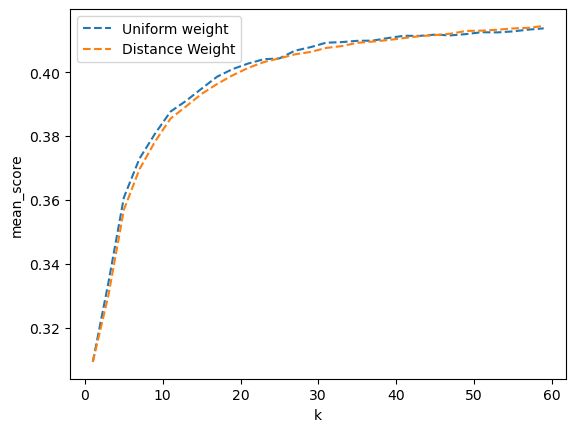

In [24]:
knn_cv_df = pd.DataFrame(columns=['weight','k','mean_score','std_score'])
for i, param in enumerate(gsc.cv_results_['params'],start=0):
    param_df = pd.DataFrame([[param['weights'], param['n_neighbors'],gsc.cv_results_['mean_test_score'][i],gsc.cv_results_['std_test_score'][i]]],columns=['weight','k','mean_score','std_score'])
    knn_cv_df = knn_cv_df.append(param_df,ignore_index=True)
plt.rcdefaults()
fig, ax = plt.subplots()
plot_1 = knn_cv_df[knn_cv_df['weight']=='uniform']
plot_2 = knn_cv_df[knn_cv_df['weight']=='distance']
plt.plot(plot_1['k'],plot_1['mean_score'],label='Uniform weight',ls='dashed')
plt.plot(plot_2['k'],plot_2['mean_score'],label='Distance Weight',ls='dashed')
plt.xlabel('k')
plt.ylabel('mean_score')
plt.legend(loc='upper left')
plt.show()

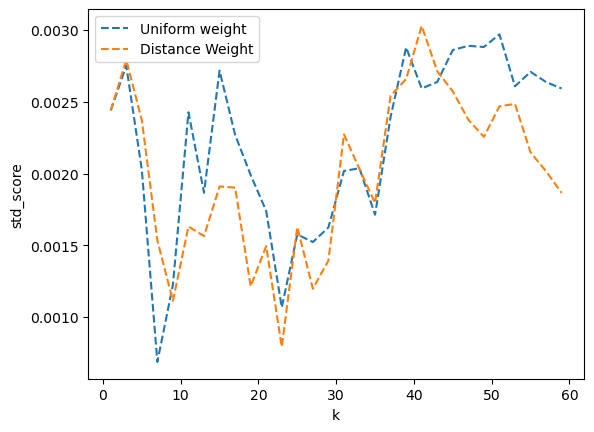

In [25]:
plt.rcdefaults()
fig, ax = plt.subplots()
plt.plot(plot_1['k'],plot_1['std_score'],label='Uniform weight',ls='dashed')
plt.plot(plot_2['k'],plot_2['std_score'],label='Distance Weight',ls='dashed')
plt.legend(loc='upper left')
plt.xlabel('k')
plt.ylabel('std_score')
plt.show()

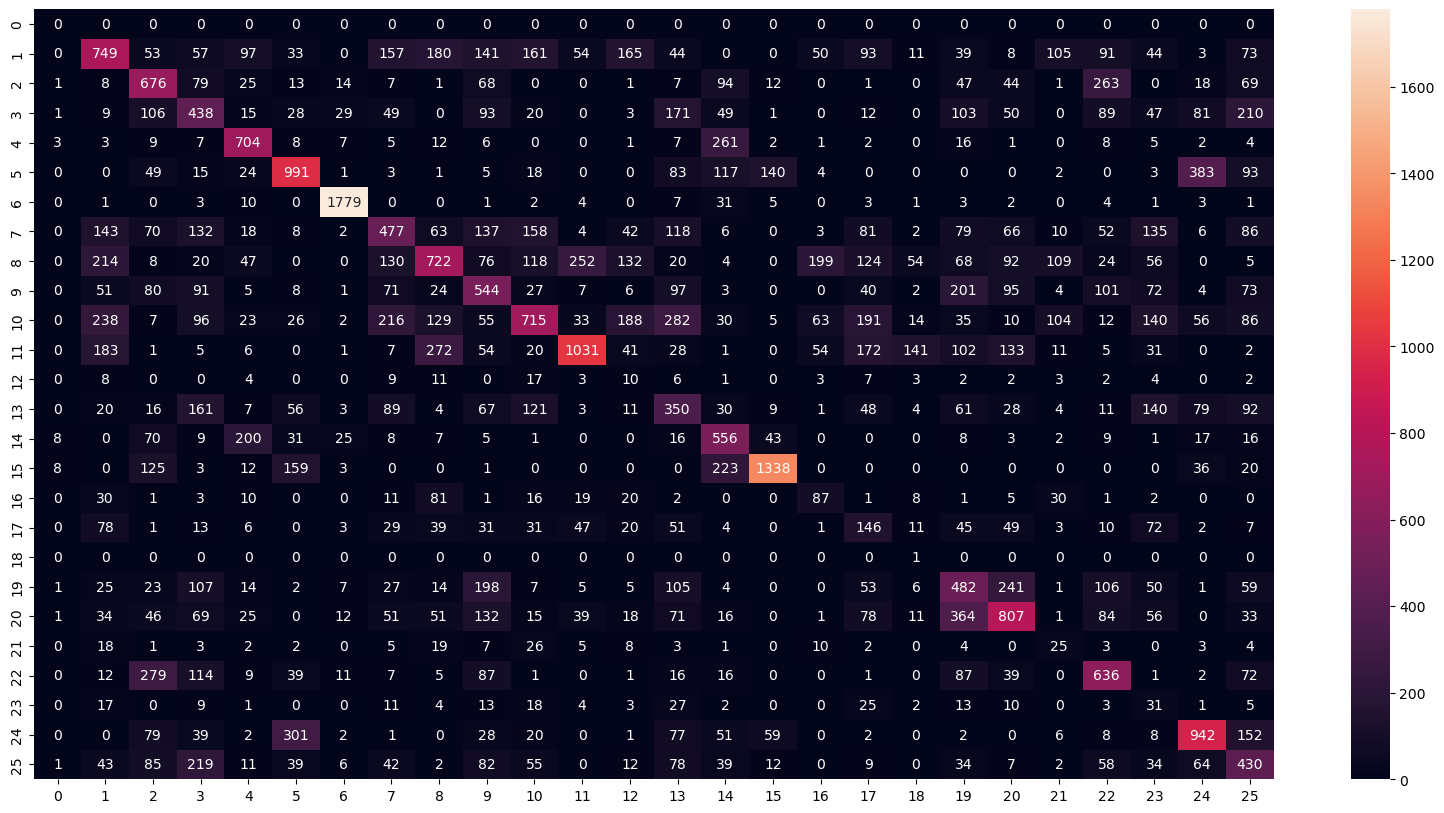

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.31      0.40      0.35      1884
           2       0.47      0.38      0.42      1785
           3       0.27      0.26      0.27      1692
           4       0.66      0.55      0.60      1277
           5       0.51      0.57      0.54      1744
           6       0.96      0.93      0.94      1908
           7       0.25      0.34      0.29      1412
           8       0.29      0.44      0.35      1641
           9       0.34      0.30      0.32      1832
          10       0.26      0.46      0.33      1567
          11       0.45      0.68      0.54      1510
          12       0.10      0.01      0.03       688
          13       0.25      0.21      0.23      1666
          14       0.54      0.36      0.43      1539
          15       0.69      0.82      0.75      1626
          16       0.26      0.18      0.22       477
          17       0.21    

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#predict test data
import seaborn as sns

tuned_knn = gsc.best_estimator_
knn_y_pred = tuned_knn.predict(X_test)
cm = pd.DataFrame(confusion_matrix(knn_y_pred,y_test))

plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

#plt.rcdefaults()
#fig, ax = plt.subplots()
#sns.heatmap(cm)
plt.show()

print(classification_report(y_pred = knn_y_pred, y_true = y_test))

## Naives Bayes (Parametric)

Wall time: 80.8 ms
Number of mislabeled points out of a total 35355 points : 23035, performance 34.85%


Text(0.5, 80.7222222222222, 'Predicted label')

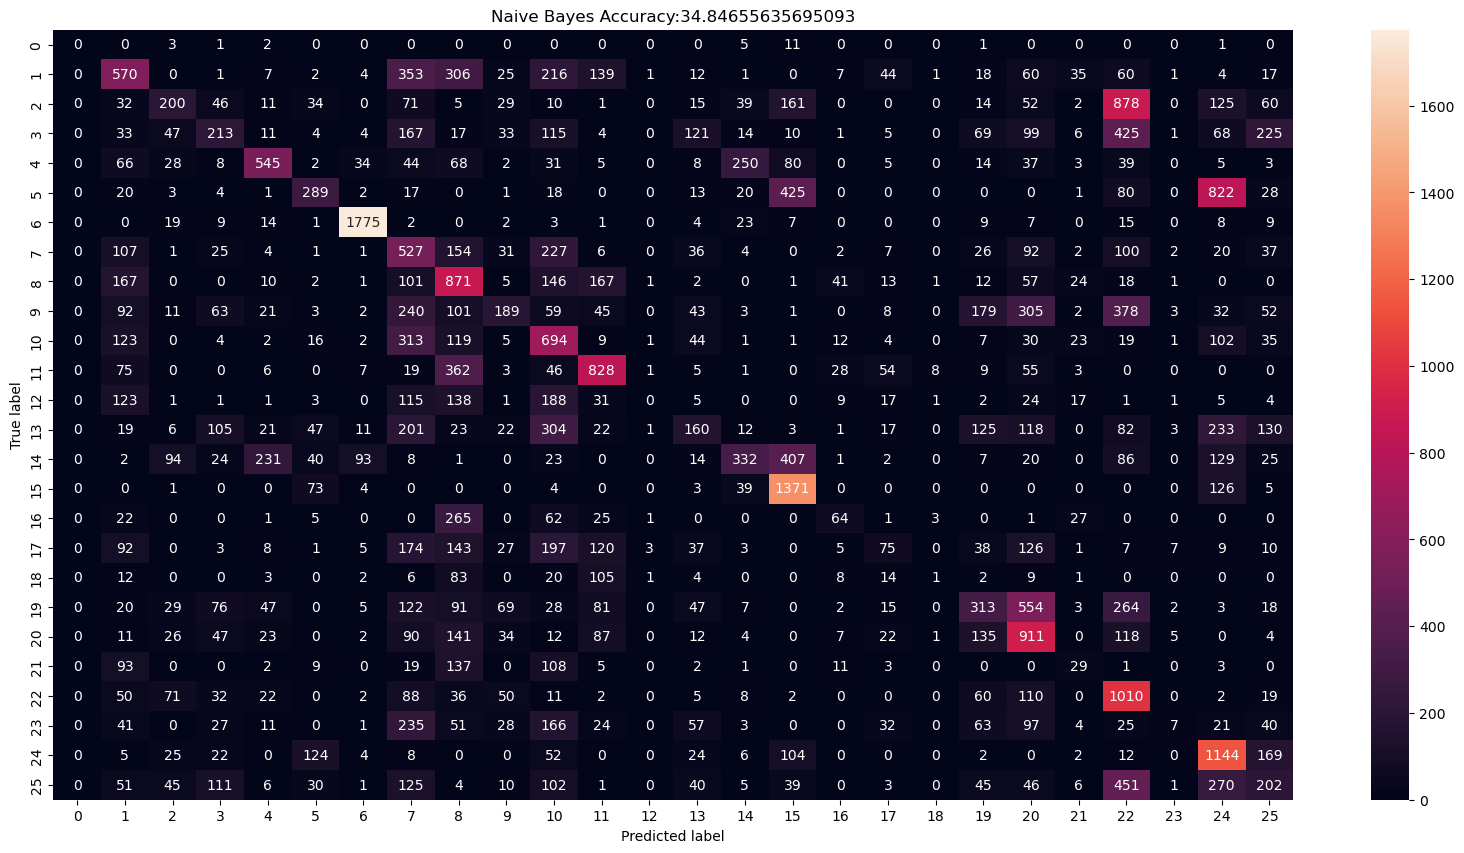

In [27]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the classifier
gnb = GaussianNB()

# Train classifier
%time gnb.fit(X_train,y_train)

# Test the classifier
predict = gnb.predict(X_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
        .format(X_test.shape[0], (y_test != predict).sum(),
            gnb.score(X_test,y_test)*100 ))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm)

# plot the confusion matrix
plt.figure(figsize=(20,10))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Neural Network

In [28]:
from sklearn.neural_network import MLPClassifier

# baseline: solver: adam, layer= 100, activition: relu
model = MLPClassifier(random_state=1)
%time model.fit(X_train, y_train)

predict = model.predict(X_test)
NN_Score = model.score(X_test,y_test)

print("Baseline Neural Network has score of {:05.2f}%".format(NN_Score * 100))
print(classification_report(y_test, predict))

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Wall time: 4min 12s
Baseline Neural Network has score of 43.36%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.36      0.36      0.36      1884
           2       0.44      0.46      0.45      1785
           3       0.29      0.27      0.28      1692
           4       0.63      0.56      0.59      1277
           5       0.53      0.62      0.57      1744
           6       0.96      0.93      0.95      1908
           7       0.27      0.42      0.33      1412
           8       0.29      0.50      0.37      1641
           9       0.38      0.31      0.34      1832
          10       0.27      0.50      0.35      1567
          11       0.46      0.70      0.55      1510
          12       0.30      0.00      0.01       688
          13       0.27      0.18      0.22      1666
          14       0.55      0.34      0.42      1539
          15       0.70      0.85      0.77      1626
          16     

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Hyperparameter tuning
parameters = {'solver': ['lbfgs', 'adam'], 
              'max_iter': [100, 200], 
              'hidden_layer_sizes':[50, 100, 150, 200]}

clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, refit=True, verbose=True)

%time clf.fit(X_train, y_train)

# print best parameter after tuning 
print(clf.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(clf.best_estimator_) 

# save for later ensemble learning use
tuned_NN =  clf.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Wall time: 1h 17min 46s
{'hidden_layer_sizes': 150, 'max_iter': 200, 'solver': 'adam'}
MLPClassifier(hidden_layer_sizes=150)


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.35      0.37      0.36      1884
           2       0.46      0.37      0.41      1785
           3       0.29      0.29      0.29      1692
           4       0.70      0.45      0.55      1277
           5       0.53      0.61      0.57      1744
           6       0.98      0.93      0.95      1908
           7       0.26      0.46      0.33      1412
           8       0.31      0.43      0.36      1641
           9       0.41      0.27      0.33      1832
          10       0.29      0.42      0.34      1567
          11       0.44      0.72      0.55      1510
          12       0.17      0.01      0.02       688
          13       0.27      0.22      0.24      1666
          14       0.48      0.50      0.49      1539
          15       0.73      0.82      0.78      1626
          16       0.31      0.25      0.28       477
          17       0.21    

Text(0.5, 80.7222222222222, 'predicted label')

<Figure size 1000x500 with 0 Axes>

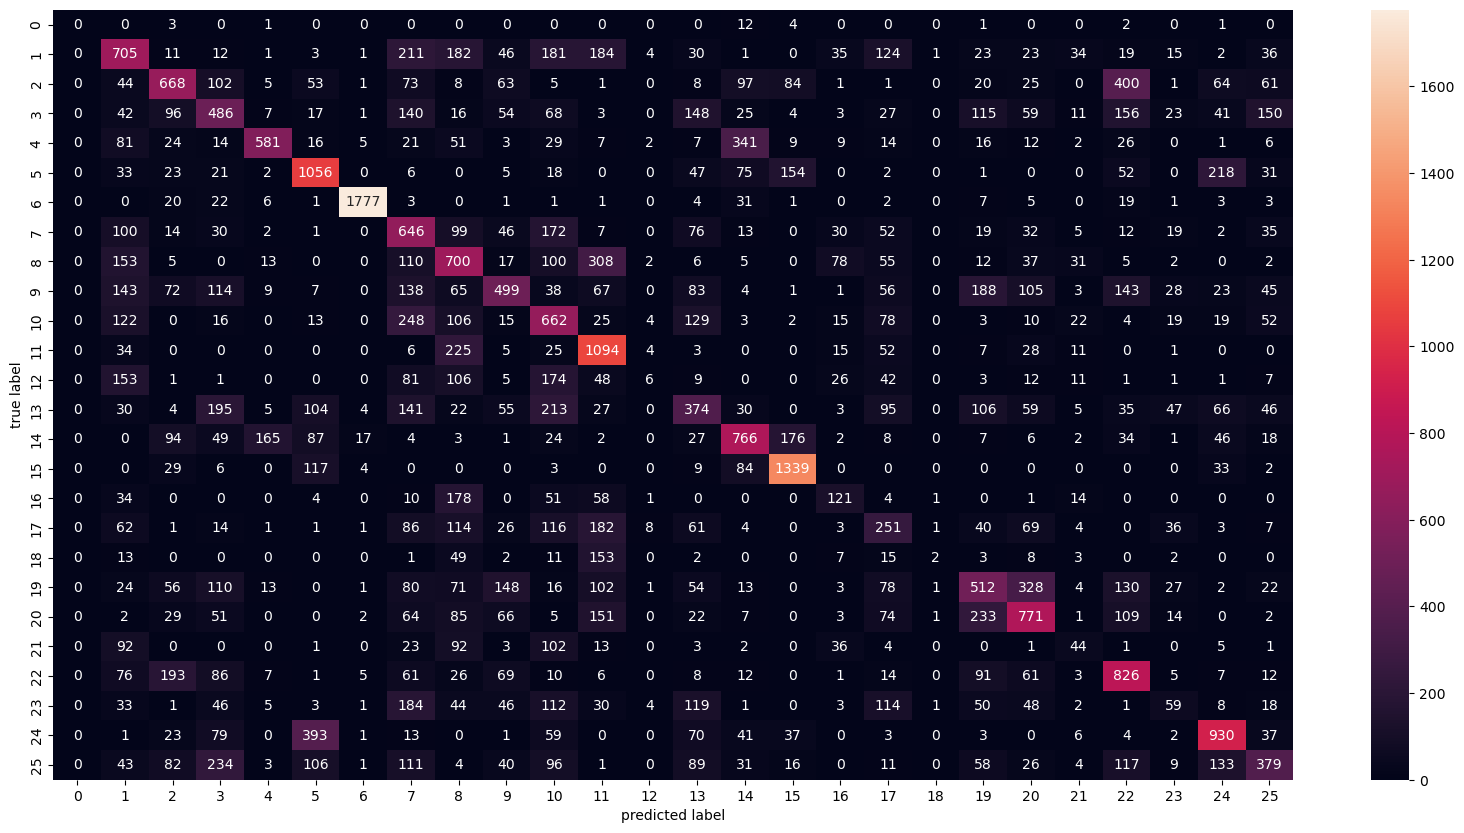

In [30]:
grid_predictions = clf.predict(X_test)

# print classification report 
print(classification_report(y_test, grid_predictions)) 

# compute the confusion matrix
plt.figure(figsize=(10,5))
cm = confusion_matrix(y_test, grid_predictions)

# plot the confusion matrixs
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

plt.ylabel('true label')
plt.xlabel('predicted label')

## Voting

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.31      0.40      0.35      1884
           2       0.44      0.41      0.42      1785
           3       0.27      0.30      0.29      1692
           4       0.61      0.56      0.59      1277
           5       0.54      0.53      0.53      1744
           6       0.95      0.93      0.94      1908
           7       0.23      0.42      0.30      1412
           8       0.29      0.49      0.37      1641
           9       0.38      0.27      0.32      1832
          10       0.27      0.47      0.34      1567
          11       0.45      0.68      0.54      1510
          12       0.18      0.00      0.01       688
          13       0.28      0.18      0.22      1666
          14       0.56      0.34      0.42      1539
          15       0.70      0.84      0.76      1626
          16       0.33      0.19      0.24       477
          17       0.24    

Text(0.5, 80.7222222222222, 'predicted label')

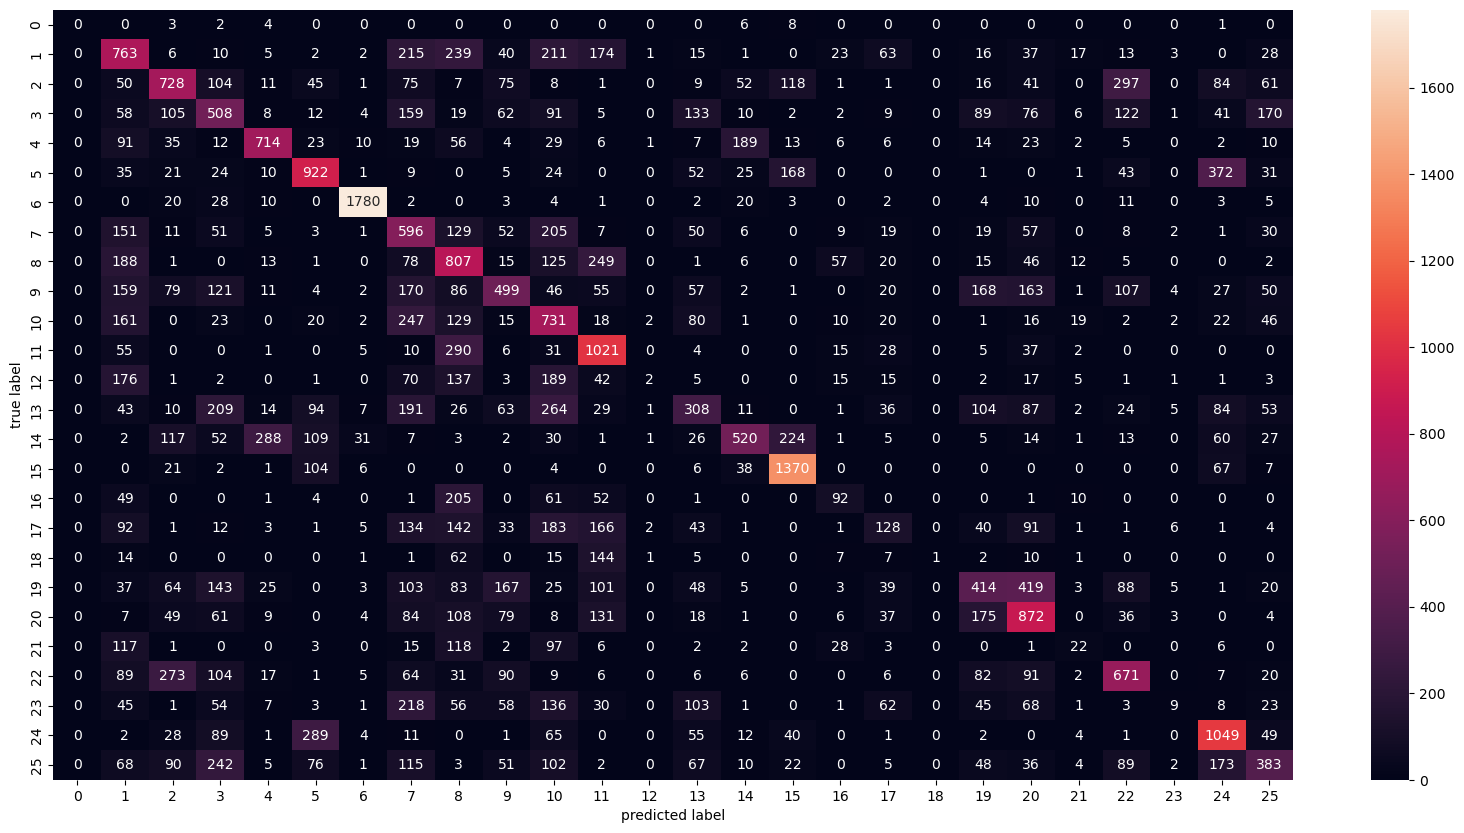

In [31]:
from sklearn.ensemble import VotingClassifier

nn = tuned_NN
gnb = GaussianNB()
knn = tuned_knn

classifiers = []
classifiers.append(('clf1', nn))
classifiers.append(('clf2', gnb))
classifiers.append(('clf3', knn))
ensemble = VotingClassifier(classifiers, voting='hard')
ensemble.fit(X_train, y_train)

y_pred_vot = ensemble.predict(X_test)

# voting matrix
print(classification_report(y_test, y_pred_vot))

cm = confusion_matrix(y_test, y_pred_vot)
# plot the confusion matrixs
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

plt.ylabel('true label')
plt.xlabel('predicted label')

## Stacking

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.31      0.40      0.35      1884
           2       0.47      0.38      0.42      1785
           3       0.27      0.26      0.27      1692
           4       0.66      0.55      0.60      1277
           5       0.51      0.57      0.54      1744
           6       0.96      0.93      0.94      1908
           7       0.25      0.34      0.29      1412
           8       0.29      0.44      0.35      1641
           9       0.34      0.30      0.32      1832
          10       0.26      0.46      0.33      1567
          11       0.45      0.68      0.54      1510
          12       0.10      0.01      0.03       688
          13       0.25      0.21      0.23      1666
          14       0.54      0.36      0.43      1539
          15       0.69      0.82      0.75      1626
          16       0.26      0.18      0.22       477
          17       0.21    

Text(0.5, 80.7222222222222, 'predicted label')

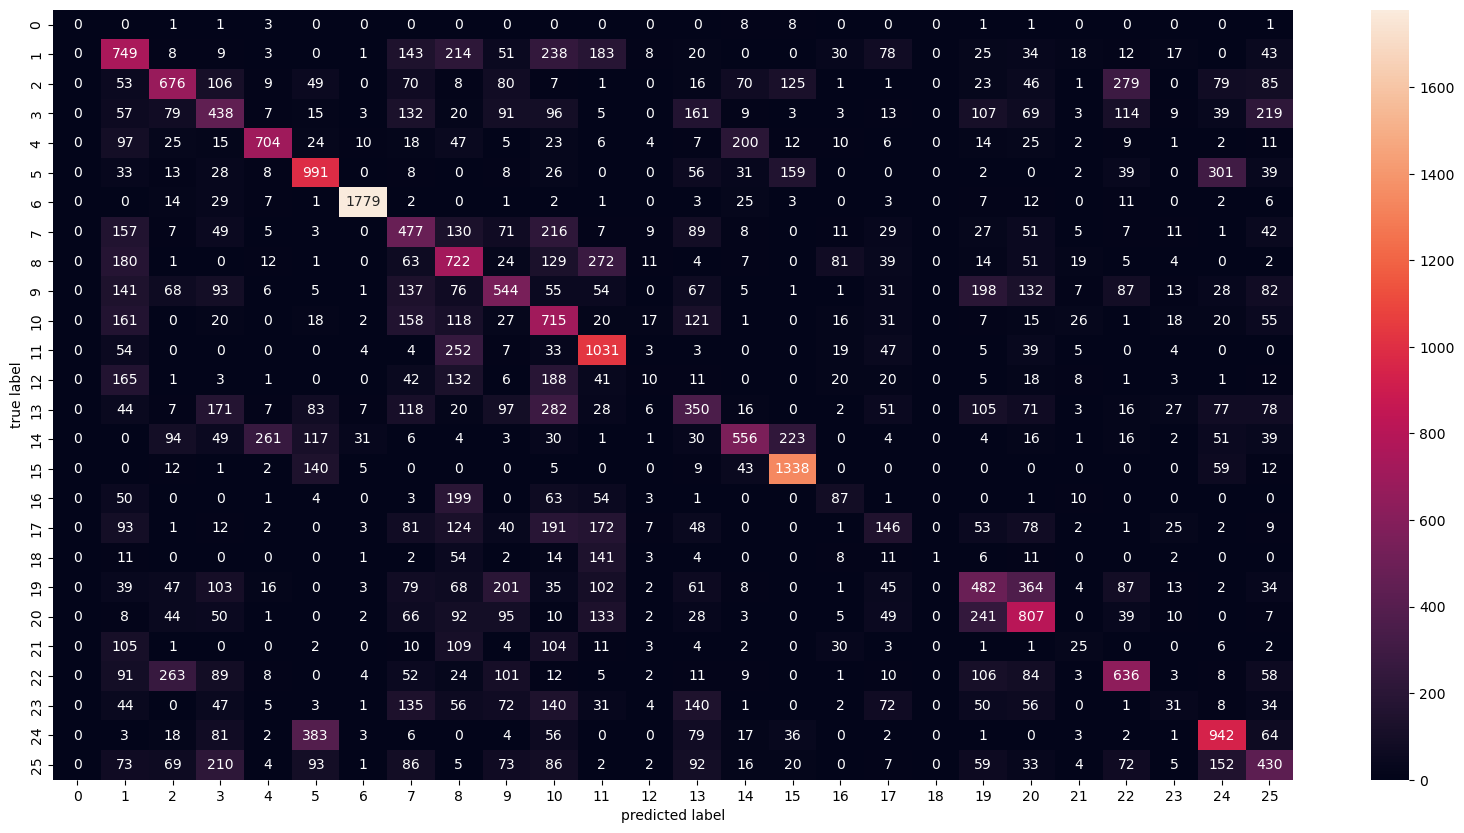

In [32]:
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC
    
meta_clf = SVC(gamma='scale')
clf_stack = StackingClassifier(classifiers=[nn, gnb, knn], meta_classifier=meta_clf, store_train_meta_features=True)

clf_stack.fit(X_train, y_train)
y_pred_stack = clf_stack.predict(X_test)

print(classification_report(y_test, y_pred_stack))

cm = confusion_matrix(y_test, y_pred_stack)

# plot the confusion matrixs
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, fmt='g')

plt.ylabel('true label')
plt.xlabel('predicted label')


## Clustering with LDA Feature Extraction

In [33]:
X_num = X.select_dtypes(['int64','float64'])
minmax_scale = MinMaxScaler()
X_num = pd.DataFrame(minmax_scale.fit_transform(X_num),columns = X_num.columns)
le = LabelEncoder()
modes = le.fit_transform(X['mode'])
print(X_num.shape)
print(modes.shape)

(176774, 11)
(176774,)


In [34]:
X_num.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
83124,0.56,0.919679,0.454994,0.023220,0.164147,0.145145,0.151798,0.627320,0.017887,0.469829,0.4050
166837,0.51,0.608434,0.459285,0.034834,0.220204,0.000000,0.142710,0.793064,0.007832,0.236740,0.1530
141599,0.29,0.036446,0.442120,0.038539,0.942942,0.000000,0.234599,0.827192,0.080123,0.489262,0.6700
119502,0.33,0.396586,0.773629,0.041017,0.417406,0.000002,0.078287,0.675522,0.219941,0.478675,0.2660
135402,0.38,0.978916,0.184637,0.036878,0.072354,0.000176,0.078085,0.622711,0.019052,0.230205,0.0738


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X_num, modes).transform(X_num)
X_lda = pd.DataFrame(X_lda)
X_lda.sample(5)

,0
121750,0.312254
10430,0.605176
108822,-1.390033
154016,-0.357801
100399,-0.431868


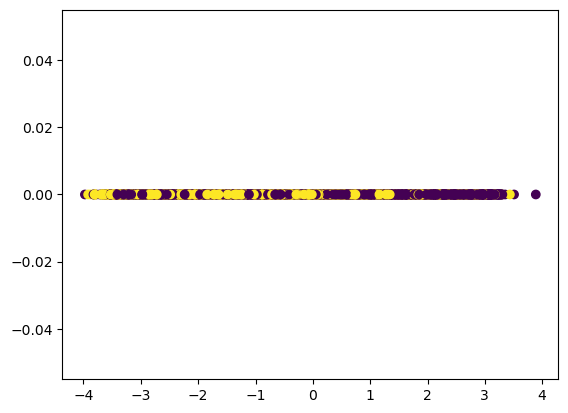

In [36]:
y_lda = np.zeros(len(X_lda))
plt.scatter(X_lda,y_lda,c=modes)

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_lda)
print(kmeans.cluster_centers_)

[[ 0.92550643]
 [-0.66880913]]


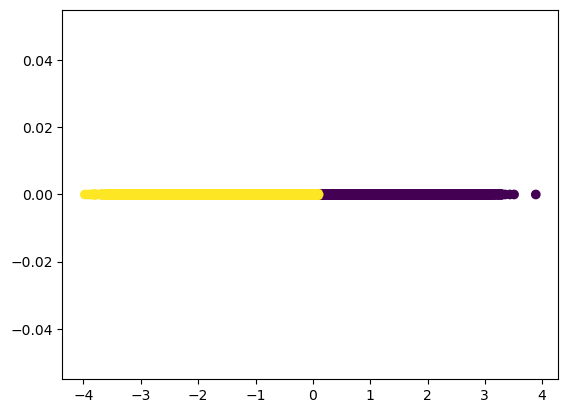

In [38]:
plt.scatter(X_lda,y_lda,c=kmeans.labels_)

              precision    recall  f1-score   support

           0       0.74      0.47      0.57    116619
           1       0.40      0.68      0.50     60155

    accuracy                           0.54    176774
   macro avg       0.57      0.57      0.54    176774
weighted avg       0.62      0.54      0.55    176774



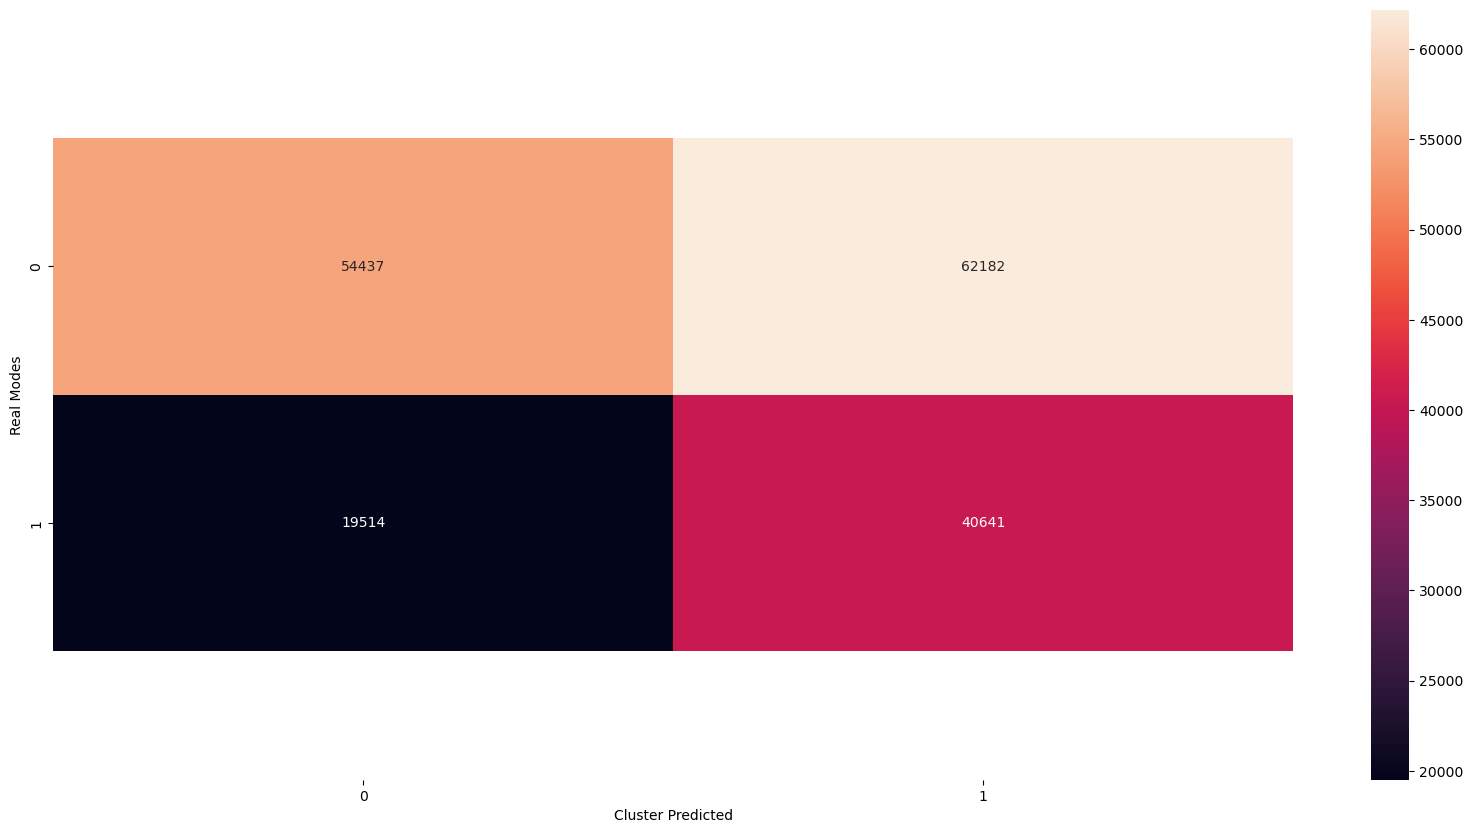

In [39]:
cluster_cm = confusion_matrix(modes,kmeans.labels_)
plt.figure(figsize=(20,10))
sns.heatmap(cluster_cm,annot=True,fmt='g')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.xlabel('Cluster Predicted')
plt.ylabel('Real Modes')
cluster_report = classification_report(modes,kmeans.labels_)
print(cluster_report)